<h1>The business scenario and problem</h1>

**The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?**

**Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.**

**If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.**

<h1> Objectives: </h1>


* Analyze the dataset to gain insights into its structure and characteristics.
* Identify the key features that influence employee attrition.
* Develop a predictive model to determine the likelihood of an employee leaving the company.
* Evaluate the model's performance using appropriate metrics.
* Conduct a feature importance analysis to identify factors impacting employee retention.
* Provide actionable recommendations to the HR department based on the analysis.


<h1> Deliverables: </h1>

1. Exploratory Data Analysis (EDA) report, highlighting key observations and trends in the dataset.
1. Selected features and engineered variables that contribute to the predictive model.
1. Predictive model capable of accurately identifying employees likely to quit.
1. Evaluation metrics report indicating the model's performance.
1. Feature importance analysis, uncovering the main factors driving employee attrition.
1. Comprehensive recommendations for the HR department to enhance employee satisfaction and retention.

<h1>Importing libraries</h1>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

# Load dataset into a dataframe
df = pd.read_csv("/kaggle/input/hr-data/HR_capstone_dataset.csv")

<!-- Data Cleaning -->

<!-- As part of data cleaning, rename columns to make them consistent and easier to work with -->

<h1>Cleaning</h1>

In [10]:
df = df.rename(columns={'Work_accident': 'work_accident',
                        'average_montly_hours': 'average_monthly_hours',
                        'time_spend_company': 'tenure',
                        'Department': 'department'})

# Display first few rows of the dataframe
display(df.head())

# Summary statistics
display(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
missing_values_html = missing_values.to_frame().rename(columns={0: 'Missing Values'})
display(missing_values_html)

# Calculate the attrition rate
attrition_rate = df['left'].mean() * 100
retention_rate = 100 - attrition_rate
attrition_rate_html = f"Attrition Rate: {attrition_rate:.2f}%"
retention_rate_html = f"Retention Rate: {retention_rate:.2f}%"
print(attrition_rate_html)
print(retention_rate_html)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


,Missing Values
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


Attrition Rate: 23.81%
Retention Rate: 76.19%


<h1>Correlation Matrix<h1>

/tmp/ipykernel_34/2033337502.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


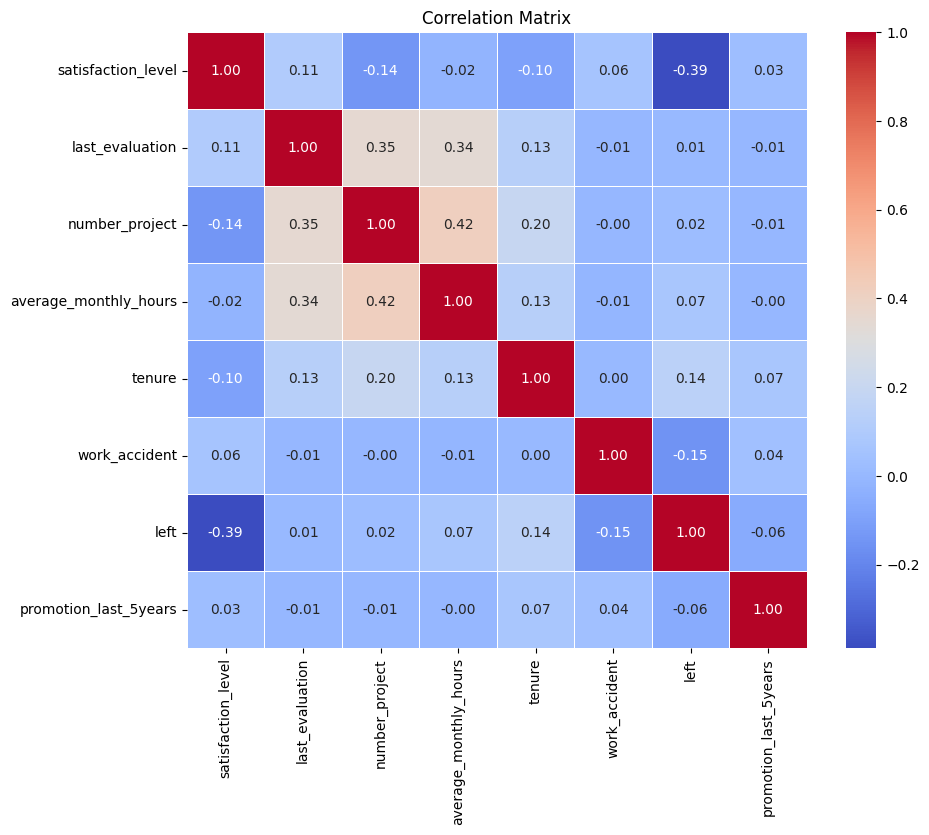

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<h1>Feature Importance Analysis</h1>

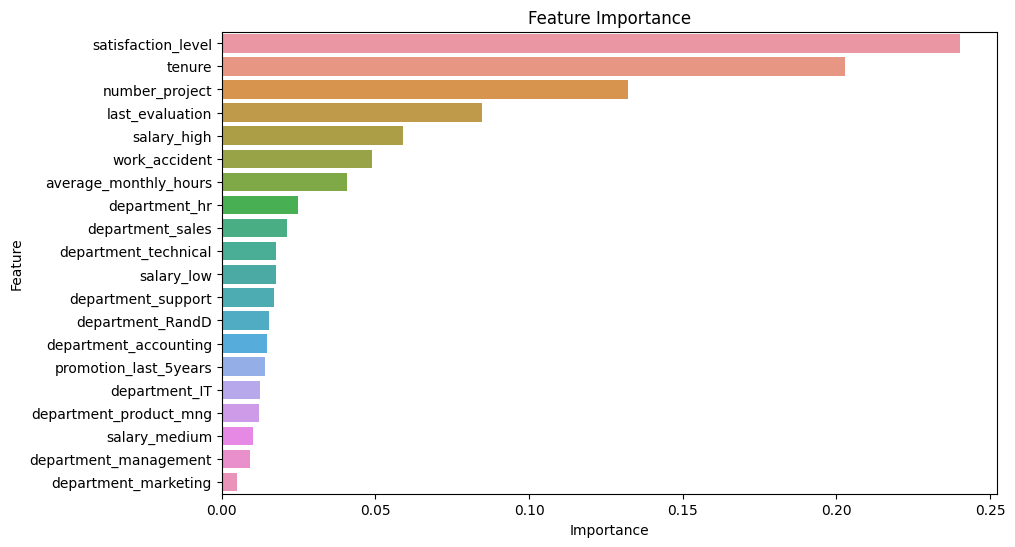

In [17]:
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=['department', 'salary'])

# Feature importance analysis
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the XGBoost classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Feature importance
importance = xgb.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

<h1>Predictive Model</h1>

In [18]:
# Predictive model
xgb = XGBClassifier(random_state=42)
xgb.fit(X, y)
predictions = xgb.predict(X)

# Train the XGBoost classifier with all data
xgb = XGBClassifier(random_state=42)
xgb.fit(X, y)

# Make predictions
predictions = xgb.predict(X)

# Evaluation metrics report
accuracy = accuracy_score(y, predictions)
precision = precision_score(y, predictions)
recall = recall_score(y, predictions)
f1 = f1_score(y, predictions)
classification_rep = classification_report(y, predictions)

accuracy_html = f"Accuracy: {accuracy:.2f}"
precision_html = f"Precision: {precision:.2f}"
recall_html = f"Recall: {recall:.2f}"
f1_html = f"F1-Score: {f1:.2f}"
classification_rep_html = f"<pre>{classification_rep}</pre>"

print(accuracy_html)
print(precision_html)
print(recall_html)
print(f1_html)
print("Classification Report:")
print(classification_rep_html)

Accuracy: 1.00
Precision: 1.00
Recall: 0.99
F1-Score: 0.99
Classification Report:
<pre>              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11428
           1       1.00      0.99      0.99      3571

    accuracy                           1.00     14999
   macro avg       1.00      0.99      0.99     14999
weighted avg       1.00      1.00      1.00     14999
</pre>


<h1>Based on the analysis, here are some recommendations for the HR department to enhance employee satisfaction and retention</h1>
<ol>
    <li>Focus on improving satisfaction levels: Identify factors contributing to low satisfaction and address them through various initiatives such as performance feedback, training opportunities, and work-life balance programs.</li>
    <li>Manage workload and number of projects: High workload and excessive number of projects can lead to increased attrition. Ensure workload is manageable and distribute projects effectively among employees.</li>
    <li>Monitor average monthly hours: Long working hours can negatively impact employee satisfaction and work-life balance. Regularly review and optimize workload to prevent burnout and maintain employee well-being.</li>
    <li>Enhance tenure and career growth opportunities: Employees with shorter tenure are more likely to leave. Implement career development programs, provide growth opportunities, and recognize employee achievements to promote long-term commitment.</li>
    <li>Improve work accident prevention: Work accidents can negatively affect employee morale. Enhance safety measures, provide training on workplace safety, and foster a culture of accident prevention.</li>
    <li>Review promotion practices: Low occurrence of promotions can contribute to dissatisfaction and attrition. Ensure fair and transparent promotion processes, and recognize and reward deserving employees.</li>
    <li>Pay attention to department and salary disparities: Analyze attrition rates across departments and salary levels. Identify any disparities and address them through measures such as career advancement opportunities and competitive compensation packages.</li>
    <li>Regularly monitor and measure employee satisfaction and engagement: Conduct surveys, gather feedback, and measure employee satisfaction and engagement levels periodically. Use the insights to identify areas of improvement and take necessary actions.</li>
</ol>
